In [1]:
include("../source/spin-1_XY_ED.jl")

odlro_matrix (generic function with 1 method)

### 1) Perturbative energy

In [2]:
N = 6
J1,J3,D,h = 1.0,0.1,0.1,1.0
boundary = "OBC"
use_sparse = false
n::Int64 = 1
J2_max::Float64 = 0.05

pert_folder = "D:\\IACS_Project\\spin-1_XY\\data\\1D\\spin-1_XY_N=$(N)\\sec_nbr_perturbed\\$(boundary)\\perturbative_energy"
pert_file = joinpath(pert_folder,"Sn=$(n)_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6))_J2max=$(round(J2_max,digits=6)).jld2")
pert_energy_file = JLD2.load(pert_file)
J2_list = pert_energy_file["J2_values"]
exact_energy_list = pert_energy_file["ED_energy"]
E1_list = pert_energy_file["1st_order"]
E2_list = pert_energy_file["2nd_order"]
E3_list = pert_energy_file["3rd_order"];

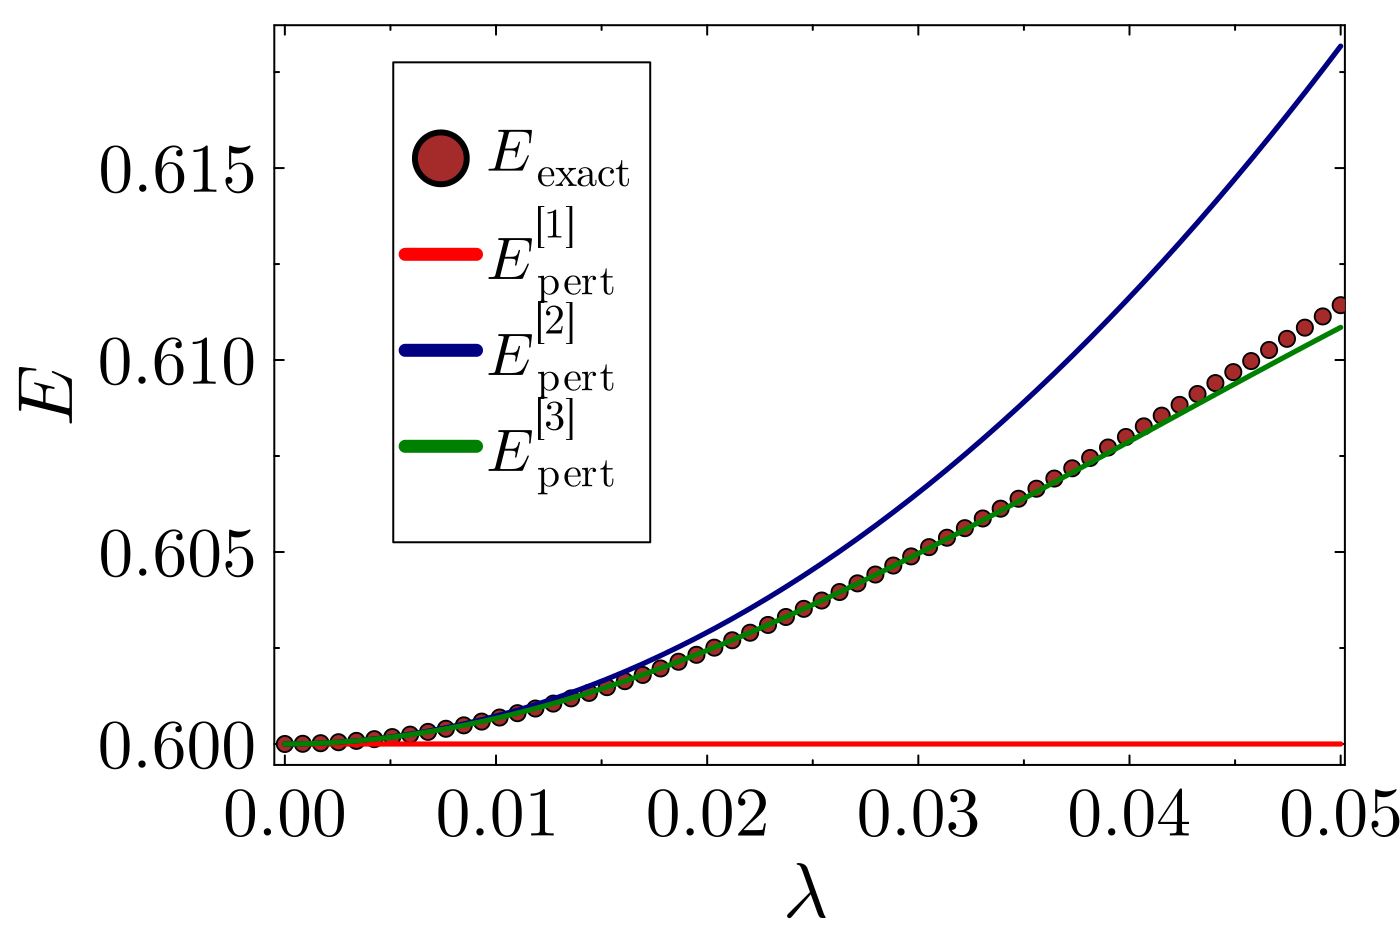

"D:\\IACS_Project\\spin-1_XY\\plots\\1D\\spin-1_XY_N=6\\sec_nbr_perturbed\\OBC\\perturbative_energy\\Perturbative_energy_Sn=3_J2max=0.05_J1=1.0_J3=0.1_D=0.1_h=1.0.png"

In [13]:
using Plots
using LaTeXStrings
using Plots.PlotMeasures
gr()

plot_size = (700,466.67)
default(fontfamily="Computer Modern")

p = scatter(J2_list,exact_energy_list,marker=:circle,markersize=4.5,markercolor=:brown,markerstrokecolor=:black,
         markerstrokewidth=1,label="\$E_{\\mathrm{exact}}\$",size=plot_size,dpi=200)

plot!(J2_list,E1_list,lw=2.6,c=:red,label="\$E^{[1]}_{\\mathrm{pert}}\$")
plot!(J2_list,E2_list,lw=2.6,c=:navy,label="\$E^{[2]}_{\\mathrm{pert}}\$")
plot!(J2_list,E3_list,lw=2.6,c=:green,label="\$E^{[3]}_{\\mathrm{pert}}\$")
# scatter!(J2_list,E2_list,marker=:square,markersize=3,markerstrokewidth=0,c=:blue,label="\$E^{[2]}_{pert}\$")
# scatter!(J2_list,E3_list,marker=:square,markersize=3,markerstrokewidth=0,c=:green,label="\$E^{[3]}_{pert}\$")

plot!(left_margin=2.5mm,right_margin=5mm,top_margin=1.2mm,bottom_margin=3mm)
plot!(framestyle=:box)
plot!(grid=false,gridlinewidth=0.6,gridalpha=0.2,gridcolor=:gray)
plot!(legend_position=(0.2,0.82),legendfontsize=20,legend_background_color=:white,
    legend_foreground_color=:black,legend_columns=1)
# plot!(ylims=(-3.45,-3.35))

xlabel!("\$\\lambda\$",guidefontsize=26)
ylabel!("\$E\$",guidefontsize=26)
title_text = "\$ N = $N \\quad $boundary,\\ J_{1} = $(round(J1,digits=6)),\\ J_{3} = $(round(J3,digits=6)), \\ D = $(round(D,digits=6)), \\ h = $(round(h,digits=6)) \$"
# title!(title_text,titlefontsize=16)

x1,x_step,x2 = 0.00,0.01,0.05
# y1,y_step,y2 = -3.4,0.005,-3.375
# y1,y_step,y2 = -1.4,0.005,-1.380
y1,y_step,y2 = 0.6,0.005,0.615
xticks = (x1:x_step:x2,[@sprintf("%.2f",x) for x in x1:x_step:x2])
yticks = (y1:y_step:y2,[@sprintf("%.3f",y) for y in y1:y_step:y2])
xminor_ticks = 2
yminor_ticks = 2
plot!(xticks=xticks,yticks=yticks,xminorgrid=false,yminorgrid=false,
      xminorticks=xminor_ticks, yminorticks=yminor_ticks,tickfontsize=22,tick_direction=:in)
plot!(xlims=(-0.0005,x2+0.0002))

folder_name = "D:\\IACS_Project\\spin-1_XY\\plots\\1D\\spin-1_XY_N=$(N)\\sec_nbr_perturbed\\$(boundary)\\perturbative_energy"
if !isdir(folder_name)
    mkpath(folder_name)
end

J2 = round(J2_list[end],digits=6)
file_path = joinpath(folder_name,"Perturbative_energy_Sn=$(n)_J2max=$(J2)_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6)).png")

display(p)
# savefig(p,file_path)

### 2) Perturbative wave function

In [9]:
N = 6
J1,J3,D,h = 1.0,0.1,0.1,1.0
boundary = "OBC"
use_sparse = false
n::Int64 = 3
J2_max::Float64 = 0.05

pert_folder = "D:\\IACS_Project\\spin-1_XY\\data\\1D\\spin-1_XY_N=$(N)\\sec_nbr_perturbed\\$(boundary)\\perturbative_wave_function"
pert_file = joinpath(pert_folder,"Sn=$(n)_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6))_J2max=$(round(J2_max,digits=6)).jld2")
pert_fidelity_file = JLD2.load(pert_file)
J2_list = pert_fidelity_file["J2_values"]
ED_fid_list = pert_fidelity_file["ED_fidelity"]
fid_1st_list = pert_fidelity_file["1st_order"]
fid_2nd_list = pert_fidelity_file["2nd_order"];

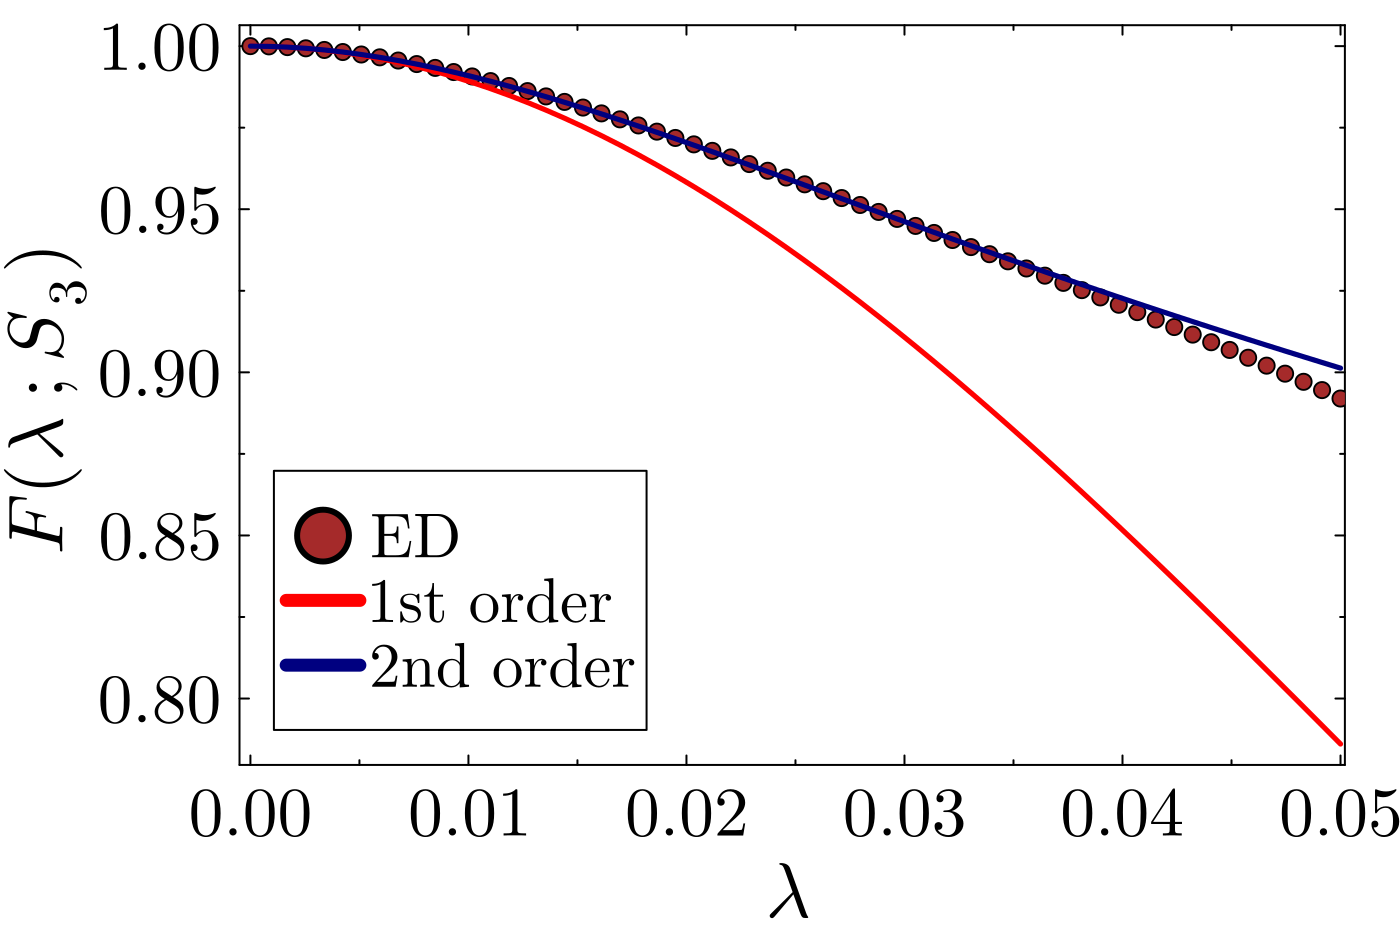

"D:\\IACS_Project\\spin-1_XY\\plots\\1D\\spin-1_XY_N=6\\sec_nbr_perturbed\\OBC\\perturbative_wave_function\\Perturbative_fidelity_Sn=3_J2max=0.05_J1=1.0_J3=0.1_D=0.1_h=1.0.png"

In [10]:
using Plots
using LaTeXStrings
using Plots.PlotMeasures
gr()

plot_size = (700,466.67)
default(fontfamily="Computer Modern")

p = scatter(J2_list,ED_fid_list,marker=:circle,markersize=4.5,markercolor=:brown,markerstrokecolor=:black,
         markerstrokewidth=1,label="ED",size=plot_size,dpi=200)

plot!(J2_list,fid_1st_list,lw=2.6,c=:red,label="1st order")
plot!(J2_list,fid_2nd_list,lw=2.6,c=:navy,label="2nd order")
# scatter!(J2_list,fid_1st_list,marker=:square,markersize=3,markerstrokewidth=0.5,c=:red,label="\$1^{st} order\$")
# scatter!(J2_list,fid_2nd_list,marker=:square,markersize=3,markerstrokewidth=0.5,c=:navy,label="\$2^{nd} order\$")

plot!(left_margin=2.5mm,right_margin=5mm,top_margin=1.2mm,bottom_margin=3mm)
plot!(framestyle=:box)
plot!(grid=false,gridlinewidth=0.6,gridalpha=0.2,gridcolor=:gray)
# plot!(legend_position=(0.15,0.25),legendfontsize=14,legend_background_color=:white,
#     legend_foreground_color=:black,legend_columns=1)
plot!(legend_position=(0.12,0.31),legendfontsize=20,legend_background_color=:white,
    legend_foreground_color=:black,legend_columns=1)

xlabel!("\$\\lambda\$",guidefontsize=26)
ylabel!("\$F(\\lambda\\ ;S_{$n})\$",guidefontsize=26)
title_text = "\$ N = $N \\quad $boundary,\\ J_{1} = $(round(J1,digits=6)),\\ J_{3} = $(round(J3,digits=6)), \\ D = $(round(D,digits=6)), \\ h = $(round(h,digits=6)) \$"
# title!(title_text,titlefontsize=16)

x1,x_step,x2 = 0.00,0.01,0.05
# y1,y_step,y2 = 0.2,0.2,1.0
# y1,y_step,y2 = 0.6,0.1,1.0
y1,y_step,y2 = 0.8,0.05,1.0
xticks = (x1:x_step:x2,[@sprintf("%.2f",x) for x in x1:x_step:x2])
yticks = (y1:y_step:y2,[@sprintf("%.2f",y) for y in y1:y_step:y2])
xminor_ticks = 2
yminor_ticks = 2
plot!(xticks=xticks,yticks=yticks,xminorgrid=false,yminorgrid=false,
      xminorticks=xminor_ticks, yminorticks=yminor_ticks,tickfontsize=22,tick_direction=:in)
plot!(xlims=(-0.0005,x2+0.0002))
# plot!(xlims=(-0.0005,0.042))

folder_name = "D:\\IACS_Project\\spin-1_XY\\plots\\1D\\spin-1_XY_N=$(N)\\sec_nbr_perturbed\\$(boundary)\\perturbative_wave_function"
if !isdir(folder_name)
    mkpath(folder_name)
end

J2 = round(J2_list[end],digits=6)
file_path = joinpath(folder_name,"Perturbative_fidelity_Sn=$(n)_J2max=$(J2)_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6)).png")

display(p)
# savefig(p,file_path)